In [1]:
import pandas as pd
import numpy as np
import mlxtend
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.datasets import make_classification, make_circles
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from yellowbrick.text import TSNEVisualizer
from sklearn.manifold import TSNE
import random
from sklearn.base import clone
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
rs = 0
df = pd.read_csv(f'MCSDatasetNEXTCONLab.csv')
df['Ligitimacy'] = df['Ligitimacy'].replace(0,-1)
trDf = df[:10139][:]
teDf = df[10139:][:]
trDf = trDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
trDf = trDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)
teDf = teDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
teDf = teDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)
trY = trDf['Ligitimacy'].values
teY = teDf['Ligitimacy'].values
trX = trDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values
teX = teDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values

In [3]:
def plot_barChart(accs,labels,Models_names,acc_st=False):
    barWidth = 0.1
    fig = plt.figure()
    br=[]
    if(acc_st):
        br.append(np.arange(len(Models_names)-1))
    else:
        br.append(np.arange(len(Models_names)))
    for i in range(1,len(labels)):
        br.append( [x + barWidth for x in br[i-1]])
    ax = fig.add_axes([0,0,1,1])
    for i in range(len(accs)):
        ax.bar(br[i] ,accs[i],barWidth)
    if(acc_st):
        ax.bar(br[len(accs)][2]*1.2 ,acc_st,barWidth)
    ax.set_ylabel('Accuarcy')
    ax.set_title('Models VS Accuracy')
    plt.xticks([r + barWidth -.025 for r in range(len(baseline_Acc)+1)],
        Models_names)
    ax.legend(labels,bbox_to_anchor=(1.04,1), loc="upper left",fontsize='medium')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()

In [4]:
target_names = ['class -1', 'class 1']

In [5]:
models_list=[ DecisionTreeClassifier()
             ,KNeighborsClassifier
             ,AdaBoostClassifier()
            ]
Models_names=['Decision Tree','KNeighborsClassifier','AdaBoost']

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
def train_model(model,X_train,y_train,X_test,y_test):
    clf =  model
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(classification_report(y_test,  preds))
    plot_confusion_matrix(clf, X_test,y_test)
    plt.title(f"{clf}")
    plt.grid(False)
    plt.show() 
    return preds

In [8]:
models_list=[ DecisionTreeClassifier()
             ,KNeighborsClassifier()
             ,AdaBoostClassifier()
            ]
Models_names=['Decision Tree','KNeighborsClassifier','AdaBoost']

*******************Decision Tree*****************************

              precision    recall  f1-score   support

          -1       0.85      0.72      0.78       597
           1       0.96      0.98      0.97      3748

    accuracy                           0.94      4345
   macro avg       0.90      0.85      0.87      4345
weighted avg       0.94      0.94      0.94      4345



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


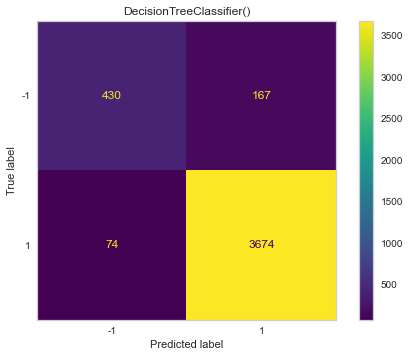

Decision Tree Accuracy: 0.9445339470655927

*******************KNeighborsClassifier*****************************

              precision    recall  f1-score   support

          -1       0.88      0.99      0.93       597
           1       1.00      0.98      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.94      0.98      0.96      4345
weighted avg       0.98      0.98      0.98      4345



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


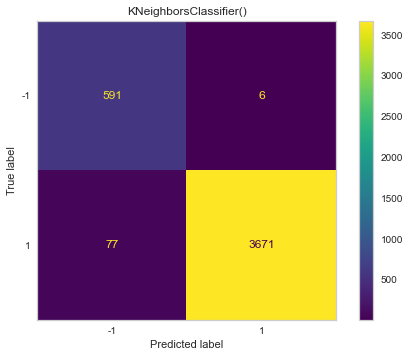

KNeighborsClassifier Accuracy: 0.980897583429229

*******************AdaBoost*****************************

              precision    recall  f1-score   support

          -1       0.86      0.78      0.82       597
           1       0.97      0.98      0.97      3748

    accuracy                           0.95      4345
   macro avg       0.91      0.88      0.90      4345
weighted avg       0.95      0.95      0.95      4345



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


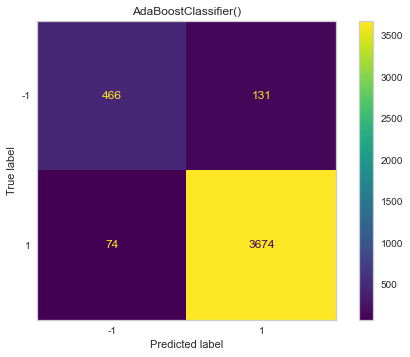

AdaBoost Accuracy: 0.952819332566168



In [9]:
baseline_Acc=[]
for i,model in enumerate(models_list):
    print(f"*******************{Models_names[i]}*****************************\n")
    baseline_pred=train_model(model,trX,trY ,teX,teY)
    acc=accuracy_score(baseline_pred,teY)
    print(f"{Models_names[i]} Accuracy: {acc}\n")
    baseline_Acc.append(acc)

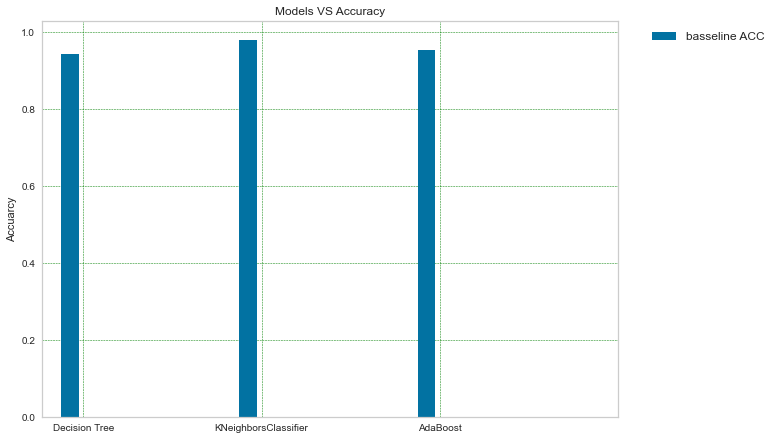

In [10]:
plot_barChart([baseline_Acc],['basseline ACC'],Models_names)

#  Oversample 


In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
oversample = SMOTE()
trX_OV, trY_OV = oversample.fit_resample(trX, trY)
teX_OV, teY_OV = oversample.fit_resample(teX, teY)


*******************Decision Tree*****************************

              precision    recall  f1-score   support

          -1       0.96      0.86      0.91      3748
           1       0.87      0.97      0.92      3748

    accuracy                           0.91      7496
   macro avg       0.92      0.91      0.91      7496
weighted avg       0.92      0.91      0.91      7496



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


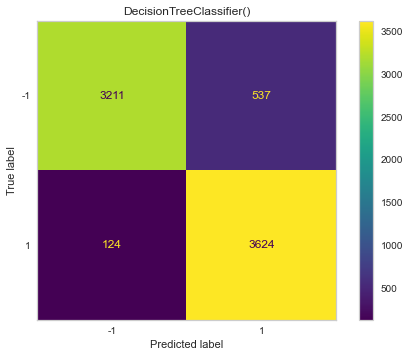

Decision Tree Accuracy: 0.9118196371398078

*******************KNeighborsClassifier*****************************

              precision    recall  f1-score   support

          -1       0.98      0.99      0.99      3748
           1       0.99      0.98      0.99      3748

    accuracy                           0.99      7496
   macro avg       0.99      0.99      0.99      7496
weighted avg       0.99      0.99      0.99      7496



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


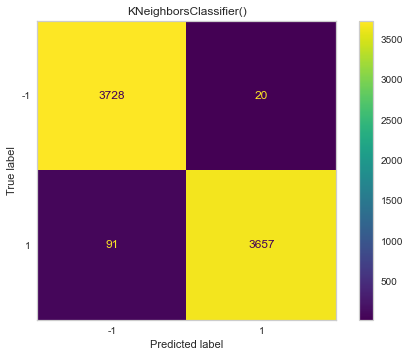

KNeighborsClassifier Accuracy: 0.9851921024546425

*******************AdaBoost*****************************

              precision    recall  f1-score   support

          -1       0.93      0.94      0.94      3748
           1       0.94      0.93      0.94      3748

    accuracy                           0.94      7496
   macro avg       0.94      0.94      0.94      7496
weighted avg       0.94      0.94      0.94      7496



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


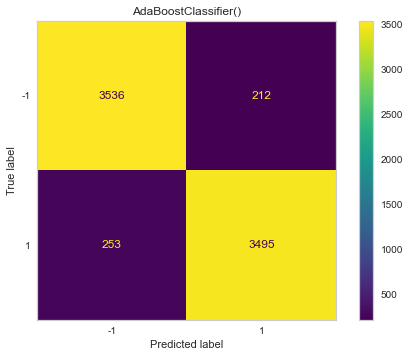

AdaBoost Accuracy: 0.9379669156883671



In [13]:
oversample_Acc=[]
for i, model in enumerate( models_list):
    print(f"*******************{Models_names[i]}*****************************\n")
    oversample_pred=train_model(model,trX_OV,trY_OV ,teX_OV,teY_OV)
    acc=accuracy_score(oversample_pred,teY_OV)
    print(f"{Models_names[i]} Accuracy: {acc}\n")
    oversample_Acc.append(acc)

In [14]:
def plot_P(accs,labels,Models_names,acc_st=False):
    barWidth = 0.1
    fig = plt.figure()
    br=[]
    if(acc_st):
        br.append(np.arange(len(Models_names)-1))
    else:
        br.append(np.arange(len(Models_names)))
    for i in range(1,len(labels)):
        br.append( [x + barWidth for x in br[i-1]])
    ax = fig.add_axes([0,0,1,1])
    for i in range(len(accs)):
        ax.plot(br[i] ,accs[i],barWidth,marker = 'o')
    if(acc_st):
        ax.plot(br[len(accs)][2]*1.2 ,acc_st,barWidth)
    ax.set_ylabel('Accuarcy')
    ax.set_title('Models VS Accuracy')
    plt.xticks([r + barWidth -.025 for r in range(len(baseline_Acc)+1)],
        Models_names)
    ax.legend(labels,bbox_to_anchor=(1.04,1), loc="upper left",fontsize='medium')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()

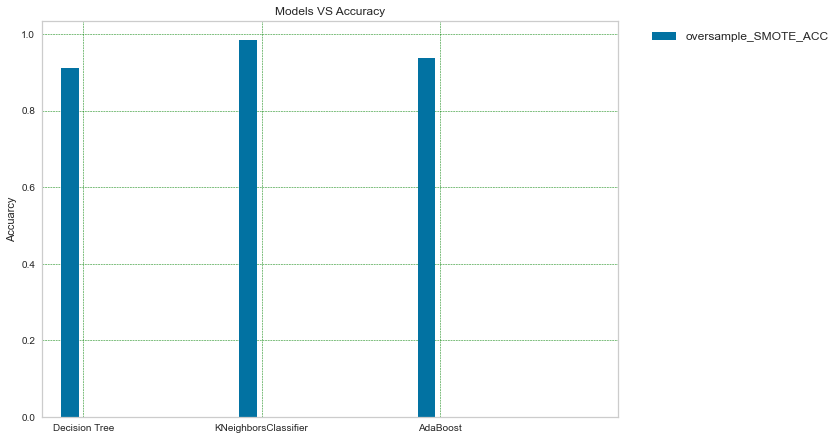

In [16]:
plot_barChart([oversample_Acc],['oversample_SMOTE_ACC'],Models_names)

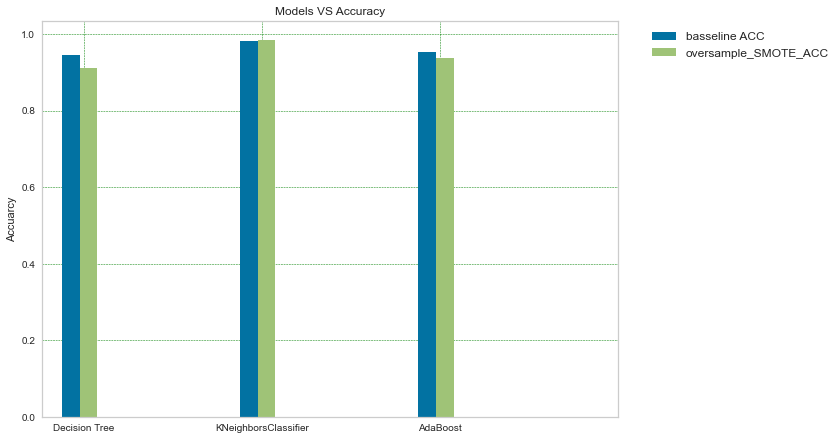

In [17]:
plot_barChart([baseline_Acc,oversample_Acc],['basseline ACC','oversample_SMOTE_ACC'],Models_names)


In [18]:
from imblearn.over_sampling import ADASYN

In [19]:
ada = ADASYN()
trX_resampled, try_resampled = ada.fit_resample(trX, trY)
teX_resampled, tey_resampled = ada.fit_resample(teX, teY)

*******************Decision Tree*****************************

              precision    recall  f1-score   support

          -1       0.96      0.83      0.89      3745
           1       0.85      0.97      0.90      3748

    accuracy                           0.90      7493
   macro avg       0.91      0.90      0.90      7493
weighted avg       0.91      0.90      0.90      7493



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


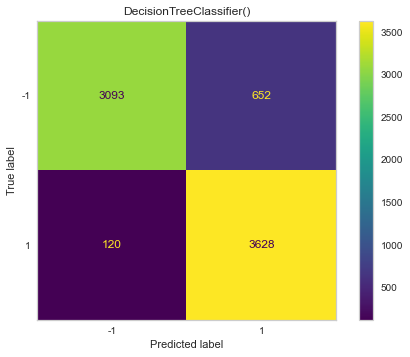

Decision Tree Accuracy: 0.8969705058054184

*******************KNeighborsClassifier*****************************

              precision    recall  f1-score   support

          -1       0.97      0.93      0.95      3745
           1       0.94      0.98      0.96      3748

    accuracy                           0.95      7493
   macro avg       0.96      0.95      0.95      7493
weighted avg       0.96      0.95      0.95      7493



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


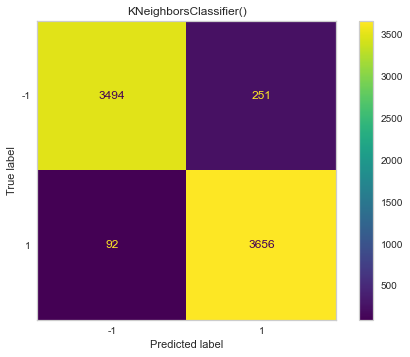

KNeighborsClassifier Accuracy: 0.9542239423461898

*******************AdaBoost*****************************

              precision    recall  f1-score   support

          -1       0.94      0.80      0.86      3745
           1       0.83      0.94      0.88      3748

    accuracy                           0.87      7493
   macro avg       0.88      0.87      0.87      7493
weighted avg       0.88      0.87      0.87      7493



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


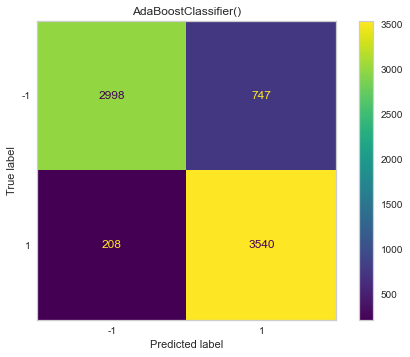

AdaBoost Accuracy: 0.8725477111971173



In [20]:
oversample_Acc2=[]
for i, model in enumerate( models_list):
    print(f"*******************{Models_names[i]}*****************************\n")
    oversample_pred=train_model(model,trX_resampled,try_resampled ,teX_resampled, tey_resampled)
    acc=accuracy_score(oversample_pred,tey_resampled)
    print(f"{Models_names[i]} Accuracy: {acc}\n")
    oversample_Acc2.append(acc)

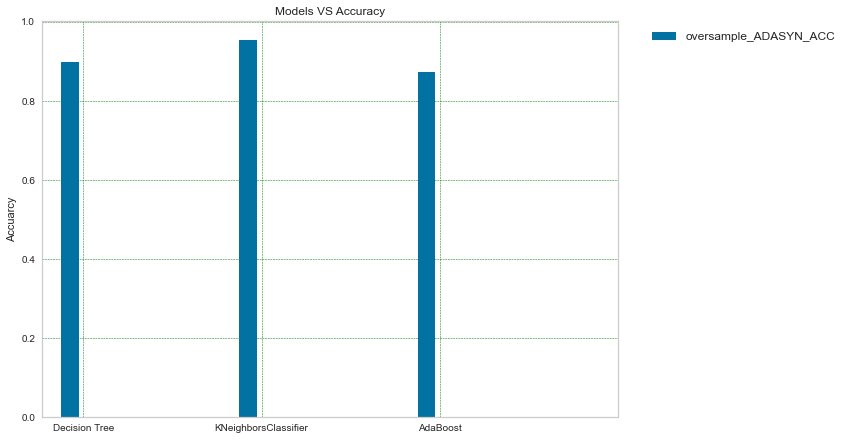

In [21]:
plot_barChart([oversample_Acc2],['oversample_ADASYN_ACC'],Models_names)


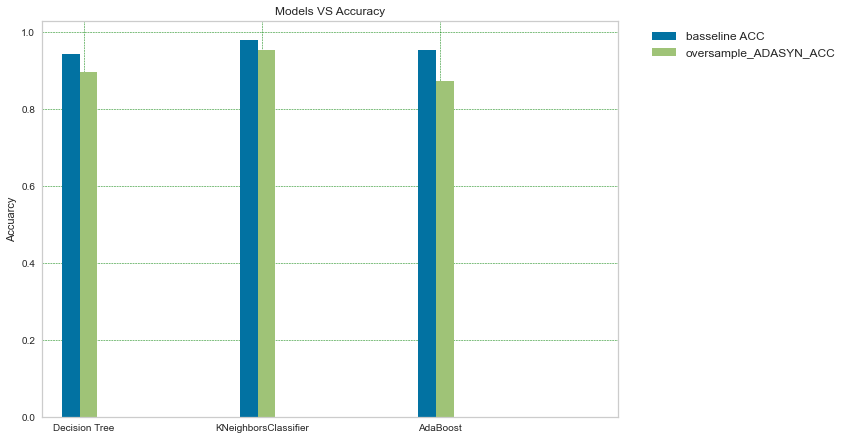

In [22]:
plot_barChart([baseline_Acc,oversample_Acc2],['basseline ACC','oversample_ADASYN_ACC'],Models_names)


In [23]:
from imblearn.under_sampling import RandomUnderSampler



In [24]:
under = RandomUnderSampler()
trX_undersample, try_undersample = under.fit_resample(trX, trY)
teX_undersample, tey_undersample = under.fit_resample(teX, teY)

*******************Decision Tree*****************************

              precision    recall  f1-score   support

          -1       0.90      0.85      0.88       597
           1       0.86      0.91      0.89       597

    accuracy                           0.88      1194
   macro avg       0.88      0.88      0.88      1194
weighted avg       0.88      0.88      0.88      1194



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


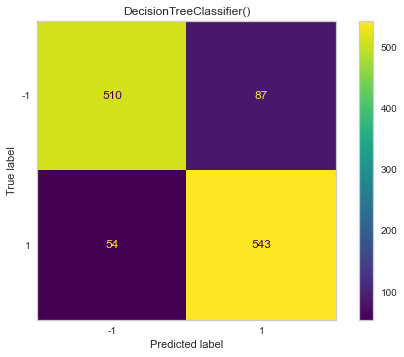

Decision Tree Accuracy: 0.8819095477386935

*******************KNeighborsClassifier*****************************

              precision    recall  f1-score   support

          -1       0.95      0.99      0.97       597
           1       0.99      0.95      0.97       597

    accuracy                           0.97      1194
   macro avg       0.97      0.97      0.97      1194
weighted avg       0.97      0.97      0.97      1194


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


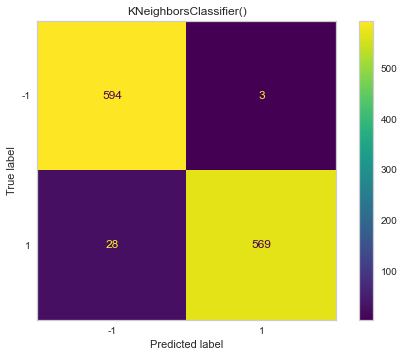

KNeighborsClassifier Accuracy: 0.974036850921273

*******************AdaBoost*****************************

              precision    recall  f1-score   support

          -1       0.92      0.95      0.93       597
           1       0.94      0.92      0.93       597

    accuracy                           0.93      1194
   macro avg       0.93      0.93      0.93      1194
weighted avg       0.93      0.93      0.93      1194



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


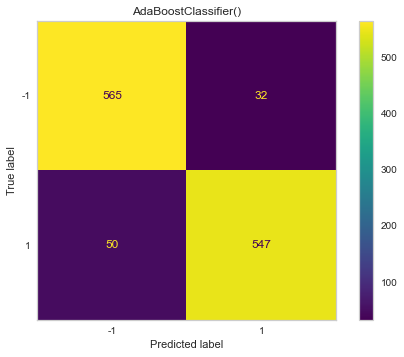

AdaBoost Accuracy: 0.931323283082077



In [25]:
undersample_Acc=[]
for i, model in enumerate( models_list):
    print(f"*******************{Models_names[i]}*****************************\n")
    undersample_pred=train_model(model,trX_undersample, try_undersample ,teX_undersample,tey_undersample)
    acc=accuracy_score(undersample_pred,tey_undersample)
    print(f"{Models_names[i]} Accuracy: {acc}\n")
    undersample_Acc.append(acc)

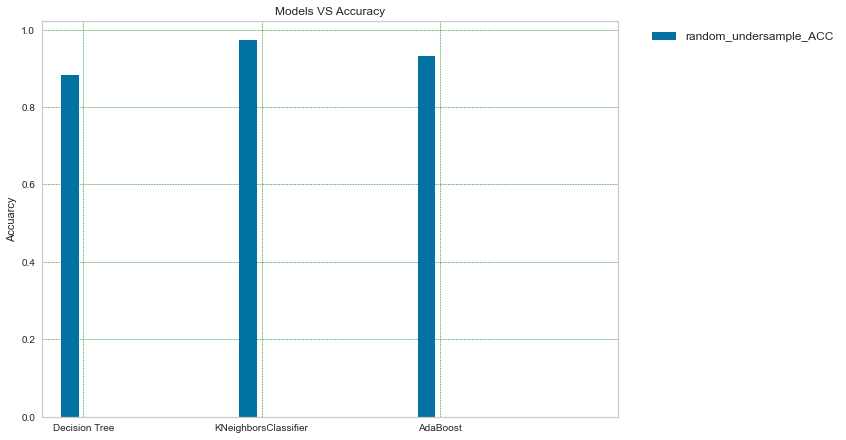

In [26]:
plot_barChart([undersample_Acc],['random_undersample_ACC'],Models_names)

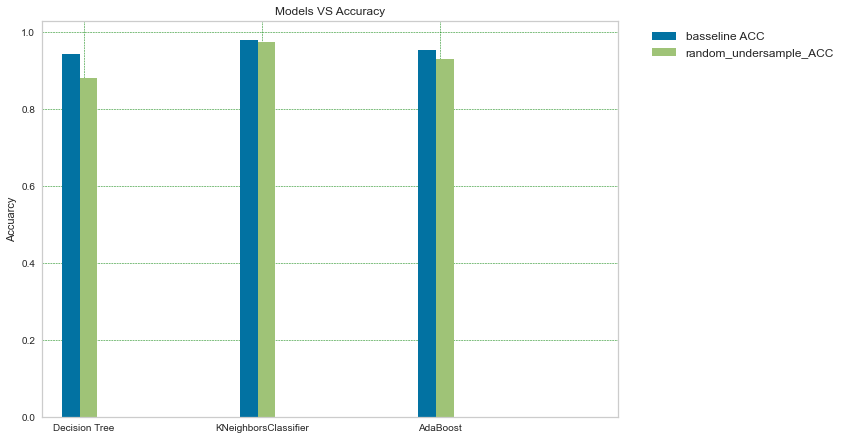

In [27]:
plot_barChart([baseline_Acc,undersample_Acc],['basseline ACC','random_undersample_ACC'],Models_names)


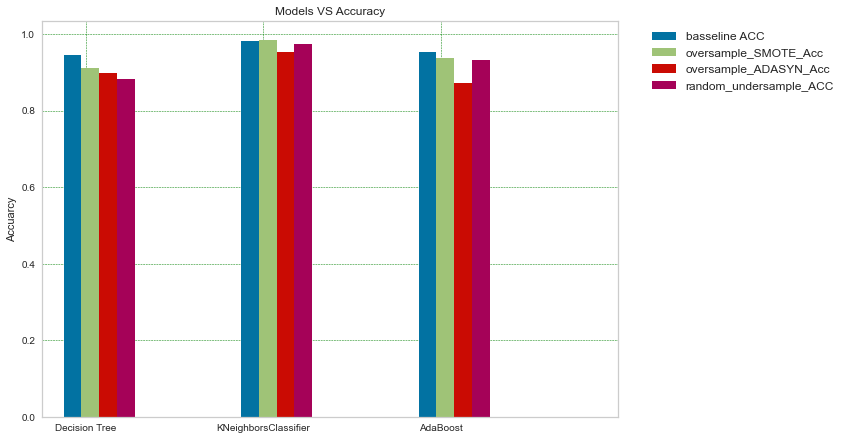

In [28]:
plot_barChart([baseline_Acc,oversample_Acc,oversample_Acc2,undersample_Acc ],
              ['basseline ACC','oversample_SMOTE_Acc','oversample_ADASYN_Acc','random_undersample_ACC'],Models_names)

In [29]:
def plot_acc(accs,labels,Models_names):
    barWidth = 0.1
    fig = plt.figure()
    br=[]
    br.append(np.arange(len(Models_names)))
    for i in range(1,len(labels)):
        br.append( [x + barWidth for x in br[i-1]])
    ax = fig.add_axes([0,0,1,1])
    for i in range(len(accs)):
        ax.plot(br[i] ,accs[i],barWidth,marker = 'o')
    
    
    ax.set_ylabel('Accuarcy')
    ax.set_title('Models VS Accuracy')
    plt.xticks([r + barWidth -.025 for r in range(len(baseline_Acc)+1)],
        Models_names)
    ax.legend(labels,bbox_to_anchor=(1.04,1), loc="upper left",fontsize='medium')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()

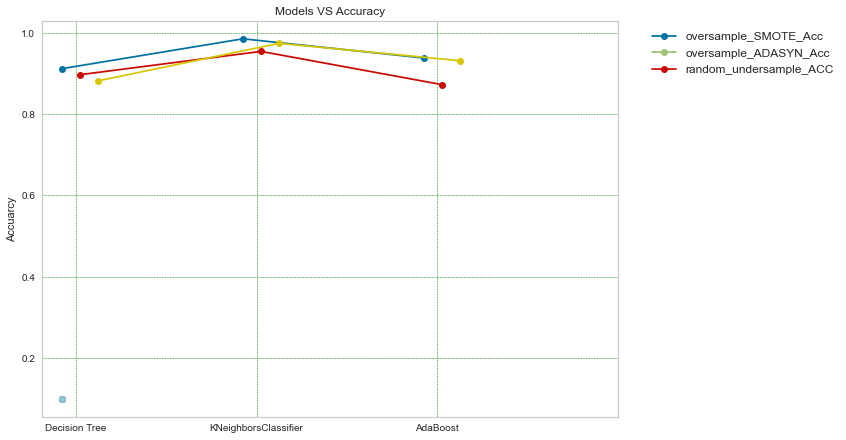

In [30]:
plot_acc([oversample_Acc,oversample_Acc2,undersample_Acc ],
              ['oversample_SMOTE_Acc','oversample_ADASYN_Acc','random_undersample_ACC'],Models_names)

# PCA with Pipline

In [31]:
from sklearn.pipeline import Pipeline

In [50]:
def tune_pca(clf, X_trian, y_train, X_test, y_test, n_min, n_max):
    accs = []
    for i in range(n_min, n_max):
        
        estimators = [('reduce_dim', PCA(n_components=i)), ('clf', clf)]
        pip = Pipeline(estimators)
        pip.fit(X_trian, y_train)
        preds = pip.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        accs.append(accuracy)
   
    return accs, preds

In [83]:
models_list2=[ DecisionTreeClassifier(random_state=0)
             ,KNeighborsClassifier()
             ,AdaBoostClassifier(random_state=0)
             ]

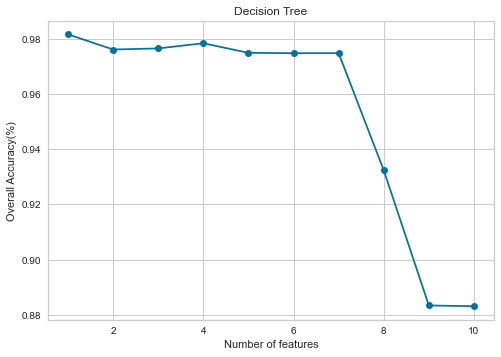

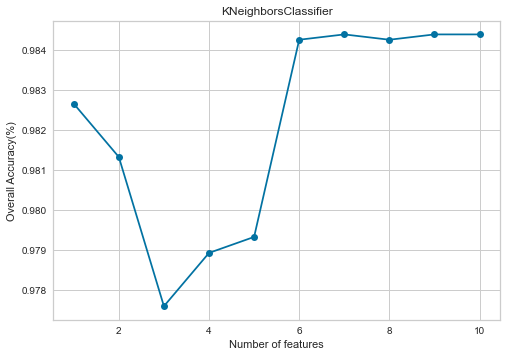

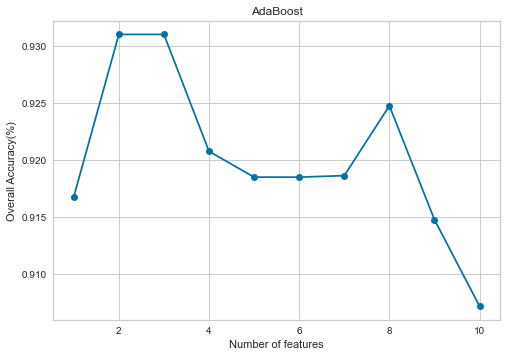

In [84]:
clf_pca_accs=[]
for i, model  in enumerate( models_list2):
    clf_pca_accs, y_pred=tune_pca(model,trX_OV, trY_OV,teX_OV, teY_OV , 1, 11)
    plt.plot(range(1,11),clf_pca_accs,marker = 'o')
    plt.title(Models_names[i])
    plt.xlabel("Number of features")
    plt.ylabel("Overall Accuracy(%)")
    plt.show()

# PCA  Features  

In [85]:
pca_accs=[]
pip_DT=Pipeline([('reduce_dim', PCA(n_components=7)), ('clf', DecisionTreeClassifier(random_state=0))])
pip_KNN=Pipeline([('reduce_dim', PCA(n_components=7)), ('clf', KNeighborsClassifier())])
pip_adaboost=Pipeline([('reduce_dim', PCA(n_components=7)), ('clf', AdaBoostClassifier(random_state=0))])

In [86]:
models_list3=[ pip_DT
             ,pip_KNN
              ,pip_adaboost ]

Accuracy =  0.9747865528281751
[[3586  162]
 [  27 3721]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


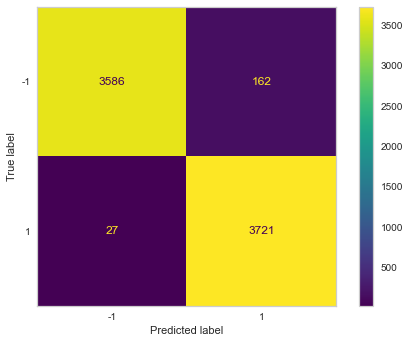

Accuracy =  0.9843916755602988
[[3722   26]
 [  91 3657]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


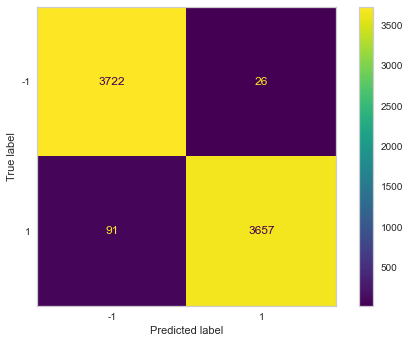

Accuracy =  0.9186232657417289
[[3623  125]
 [ 485 3263]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


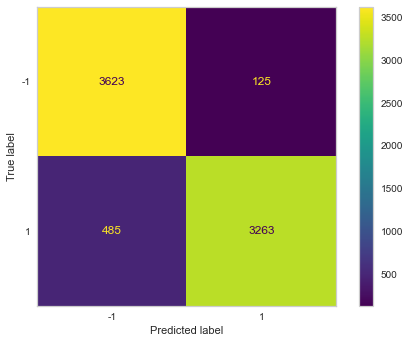

In [87]:
pca_accs=[]

for i,clf in enumerate(models_list3):
    clf.fit(trX_OV, trY_OV)
    preds = clf.predict(teX_OV)
    accuracy = accuracy_score(teY_OV, preds)
    print("Accuracy = ",accuracy)
    pca_accs.append(accuracy)
    print(confusion_matrix(teY_OV,preds ))
    plot_confusion_matrix(clf, teX_OV,teY_OV)
    plt.grid(False)
    plt.show()

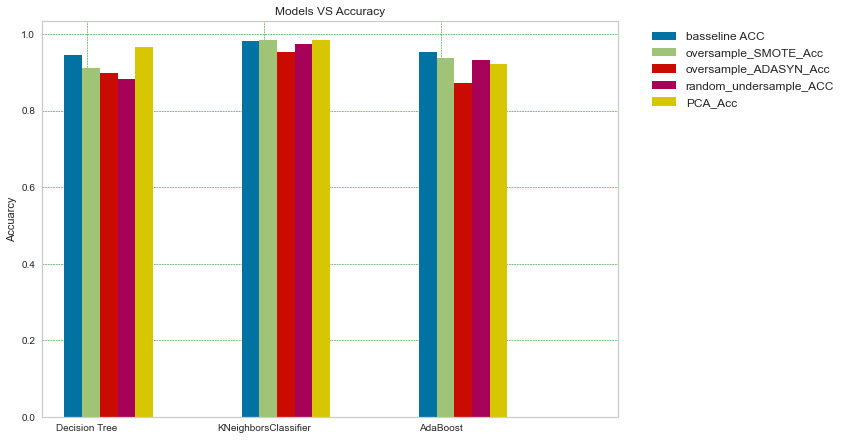

In [41]:
plot_barChart([baseline_Acc,oversample_Acc,oversample_Acc2,undersample_Acc,pca_accs],
              ['basseline ACC','oversample_SMOTE_Acc','oversample_ADASYN_Acc','random_undersample_ACC','PCA_Acc'],Models_names)

In [39]:
def generateRandomRGB(n):
  colors = [(random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), 
               random.uniform(0.0, 1.0)) for i in range(n)]
  return colors

def plotData(X, y, colors=None, title='', xlabel='', ylabel=''):
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)
    if(colors is None):
      colors = generateRandomRGB(n_classes)
        
    for class_index in range(n_classes):
      plt.scatter(X[y == unique_classes[class_index],0], X[y == unique_classes[class_index],1], 
                  label=unique_classes[class_index], color=colors[class_index],
                  s=100)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# T-SNA before PCA 

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


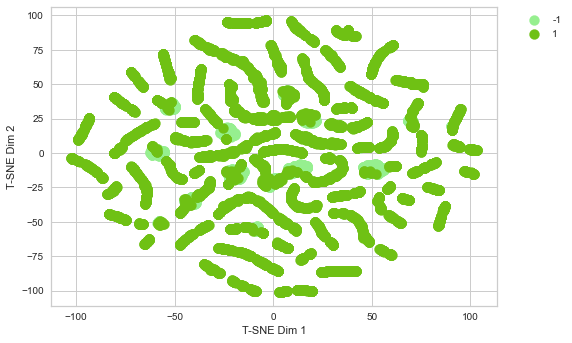

In [52]:
tsne = TSNE(n_components=2, random_state=0)
X_train_reduced = tsne.fit_transform(trX)

colors = generateRandomRGB(len(trY))
plotData(X_train_reduced, trY, colors, xlabel='T-SNE Dim 1', ylabel='T-SNE Dim 2')

# T-SNA With PCA

In [53]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(trX_OV, trY_OV)
X_test_pca = pca.transform(teX_OV)

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


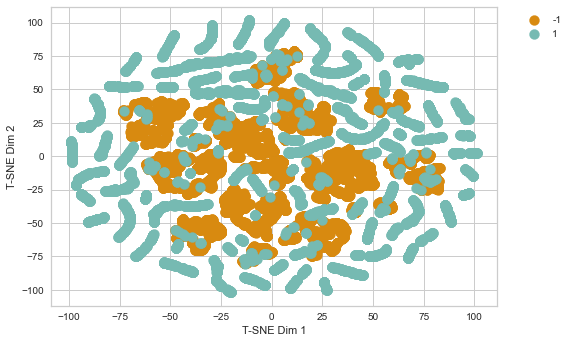

In [54]:
tsne = TSNE(n_components=2, random_state=0)
X_train_reduced = tsne.fit_transform(X_train_pca)

colors = generateRandomRGB(len(trY_OV))
plotData(X_train_reduced, trY_OV, colors, xlabel='T-SNE Dim 1', ylabel='T-SNE Dim 2')

# Stacking 

In [42]:
def plotEstimator(trX, trY, teX, teY, estimator, title=''):
  estimator = clone(estimator).fit(trX, trY)
  h = .02
  x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
  y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  Z = estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
  # plt.legend()
  plt.title(title)
  plt.show()

In [43]:
RANDOM_STATE = 0


In [76]:
pip_DT=Pipeline([('reduce_dim', PCA(n_components=7)), ('clf', DecisionTreeClassifier(random_state=0))])
pip_KNN=Pipeline([('reduce_dim', PCA(n_components=7)), ('clf', KNeighborsClassifier())])
pip_adaboost=Pipeline([('reduce_dim', PCA(n_components=7)), ('clf', AdaBoostClassifier(random_state=0))])
pip_logistic =Pipeline([ ('clf', LogisticRegression(random_state=RANDOM_STATE))])

In [77]:
oversample = SMOTE()
trX_OV, trY_OV = oversample.fit_resample(trX, trY)
teX_OV, teY_OV = oversample.fit_resample(teX, teY)

In [78]:
from sklearn.ensemble import StackingClassifier

def getClfName(clf):
    return clf.__class__.__name__

def stackClassifiers(X_train, X_test, y_train, y_test, classifiers, aggregator):
  stacking = StackingClassifier([(clf, clf) for clf in classifiers], 
                                aggregator, n_jobs=-1)
  stacking.fit(X_train, y_train)
  y_pred = stacking.predict(X_test)
  print(confusion_matrix(y_pred, y_test))
  plot_confusion_matrix(stacking, X_test, y_test)
  plt.grid(False)
  plt.show()
  acc = accuracy_score(y_test, y_pred)
  print(acc)
  return acc
  

[[3713   61]
 [  35 3687]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


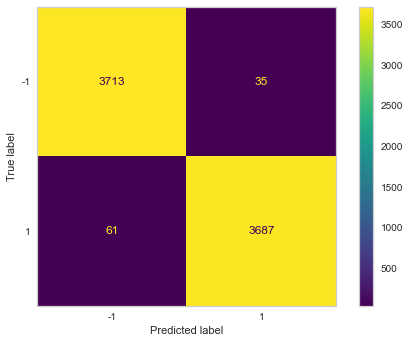

0.9871931696905016


In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

clfs = [pip_DT,  pip_KNN,pip_adaboost]
agg = pip_logistic


acc_stacking=stackClassifiers(trX_OV, teX_OV, trY_OV, teY_OV, clfs, agg)
acc_Stacking=[acc_stacking,acc_stacking,acc_stacking]

In [80]:
total_ACC=[baseline_Acc,oversample_Acc,oversample_Acc2,undersample_Acc,pca_accs]

In [81]:
            
Models_names2=['Decision Tree','KNeighborsClassifier','AdaBoost',"Stacking"]

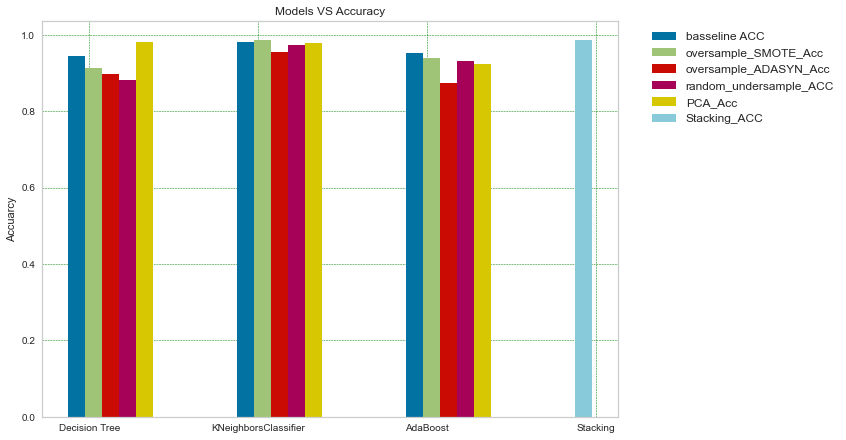

In [82]:
plot_barChart(total_ACC,
            ['basseline ACC','oversample_SMOTE_Acc','oversample_ADASYN_Acc','random_undersample_ACC','PCA_Acc','Stacking_ACC']
              ,Models_names2,acc_Stacking)